# Searching for Be stars in binaries with compact objects
## Preliminary data visualizations
### Caden Gobat, The George Washington University

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from mpl_toolkits import mplot3d
from matplotlib.lines import Line2D
from ipywidgets import interactive

In [2]:
master = pd.read_csv("./catalogs/master.csv")
num_options = ['V','vsini','Fluxb','Fluxh','Fluxm','Fluxs','Fluxu','Fluxw','S/N','NHGal','HRhm','HRhs','HRms','parallax',
               'Gflux','Gmag', 'BPflux', 'BPmag', 'RPflux', 'RPmag', 'radial_velocity', 'teff_val', 'a_g_val', 'radius_val',
               'lum_val','rest','Vmag','Porb','radvel','redshift','plx','B','V.1','R','J','H','K','u','g','r','i','z',
               'CR0','HR_1','HR_2','PcstS0','FPO0','FPU0','Flux8','HR1','HR2','HR3','HR4','epsi','sepsi',
               'Flux1','Flux2','Flux3','Flux4','Flux5']
cat_options = ['Category','SpType','main_type','other_types','sp_type','VarFlag','Class']

## Skymap

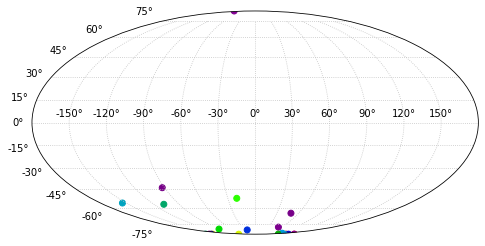

In [3]:
fig, ax = plt.subplots(figsize=(8,6),subplot_kw={'projection': "mollweide"})
ax.grid(color='silver', linestyle=':')
skymap = ax.scatter(master["_RAJ2000_Gaia"], master["_DEJ2000_Gaia"], c=master["teff_val"], cmap='nipy_spectral_r')

## Exploratory pairplots

c:\users\caden gobat\appdata\local\programs\python\python38\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


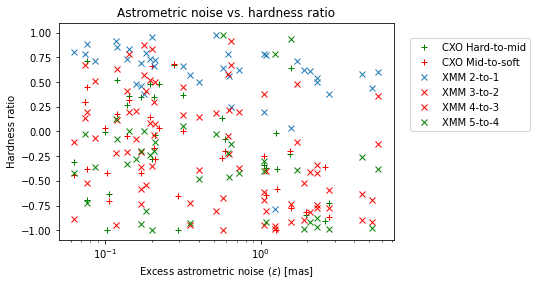

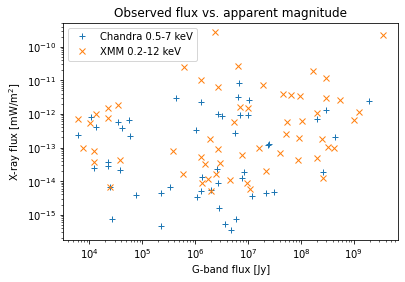

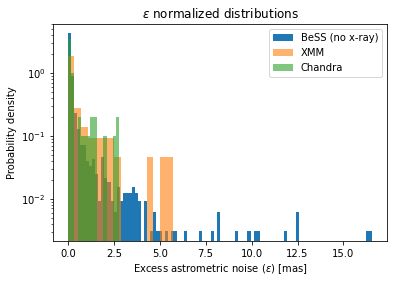

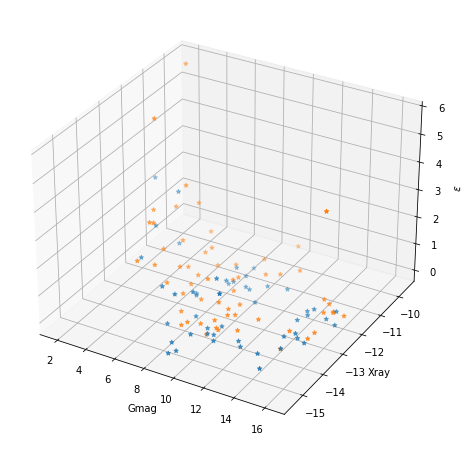

In [4]:
fig,ax = plt.subplots()
plt.plot(master["epsi"],master["HRhm"],"g+",label="CXO Hard-to-mid")
plt.plot(master["epsi"],master["HRms"],"r+",label="CXO Mid-to-soft")
#plt.plot(master["epsi"],master["HRsu"],"+",label="CXO Soft-to-ultrasoft")
plt.plot(master["epsi"],master["HR1"],"x",label="XMM 2-to-1")
plt.plot(master["epsi"],master["HR2"],"rx",label="XMM 3-to-2")
plt.plot(master["epsi"],master["HR3"],"rx",label="XMM 4-to-3")
plt.plot(master["epsi"],master["HR4"],"gx",label="XMM 5-to-4")
plt.xlabel("Excess astrometric noise ($\epsilon$) [mas]")
plt.ylabel("Hardness ratio")
plt.title("Astrometric noise vs. hardness ratio")
plt.legend(loc=(1.05,0.5))
plt.xscale("log")
fig.savefig("./plots/noise_HR.png",bbox_inches="tight",dpi=300)

fig,ax = plt.subplots()
plt.plot(master["Gflux"],master["Fluxb"],"+",label="Chandra 0.5-7 keV")
plt.plot(master["Gflux"],master["Flux8"],"x",label="XMM 0.2-12 keV")
plt.xlabel("G-band flux [Jy]")
plt.ylabel("X-ray flux [mW/m$^2$]")
plt.yscale("log")
plt.xscale("log")
plt.title("Observed flux vs. apparent magnitude")
plt.legend()
fig.savefig("./plots/xray_optical_flux.png",bbox_inches="tight",dpi=300)

fig,ax = plt.subplots()
plt.hist(master[master["4XMM"].isna() & master["2CXO"].isna()]["epsi"],density=True,bins=100,label="BeSS (no x-ray)")
plt.hist(master[~master["4XMM"].isna()]["epsi"],density=True,bins=16,alpha=0.6,label="XMM")
plt.hist(master[~master["2CXO"].isna()]["epsi"],density=True,bins=16,alpha=0.6,label="Chandra")
plt.xlabel("Excess astrometric noise ($\epsilon$) [mas]")
plt.ylabel("Probability density")
plt.title("$\epsilon$ normalized distributions")
plt.legend()
plt.yscale("log")
fig.savefig("./plots/astrometric_noise_distribution.png",bbox_inches="tight",dpi=300)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(master["Gmag"],np.log10(master["Fluxb"]),master["epsi"],marker="*",label="Chandra 0.5-7 keV")
ax.scatter3D(master["Gmag"],np.log10(master["Flux8"]),master["epsi"],marker="*",label="XMM 0.2-12 keV")
ax.set_xlabel("Gmag")
ax.set_ylabel("Xray")
ax.set_zlabel("$\epsilon$")
plt.show()

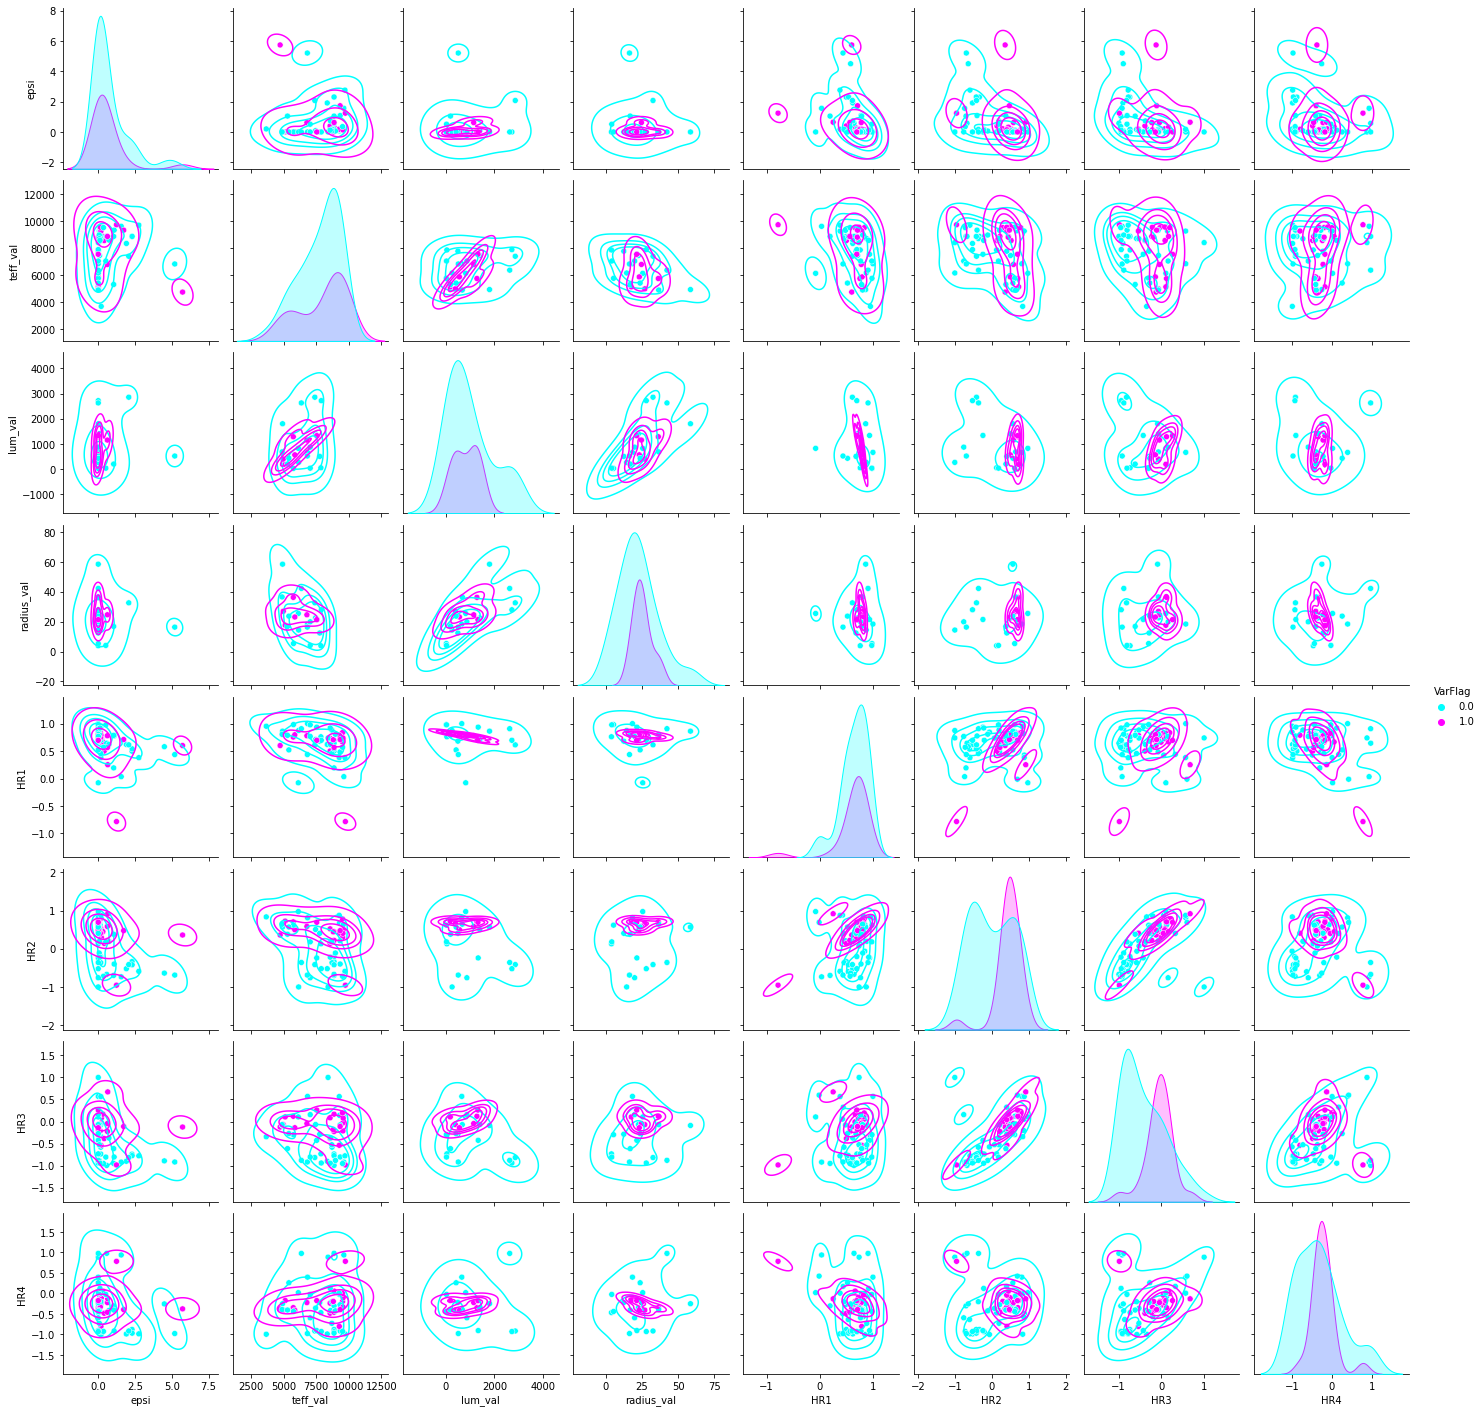

In [11]:
g = sns.pairplot(master, vars=['epsi', 'teff_val', 'lum_val', 'radius_val', 'HR1', 'HR2', 'HR3', 'HR4'],
                            hue="VarFlag", palette="cool")
g.map_offdiag(sns.kdeplot, levels=5)
plt.show()

<Figure size 1440x1440 with 0 Axes>

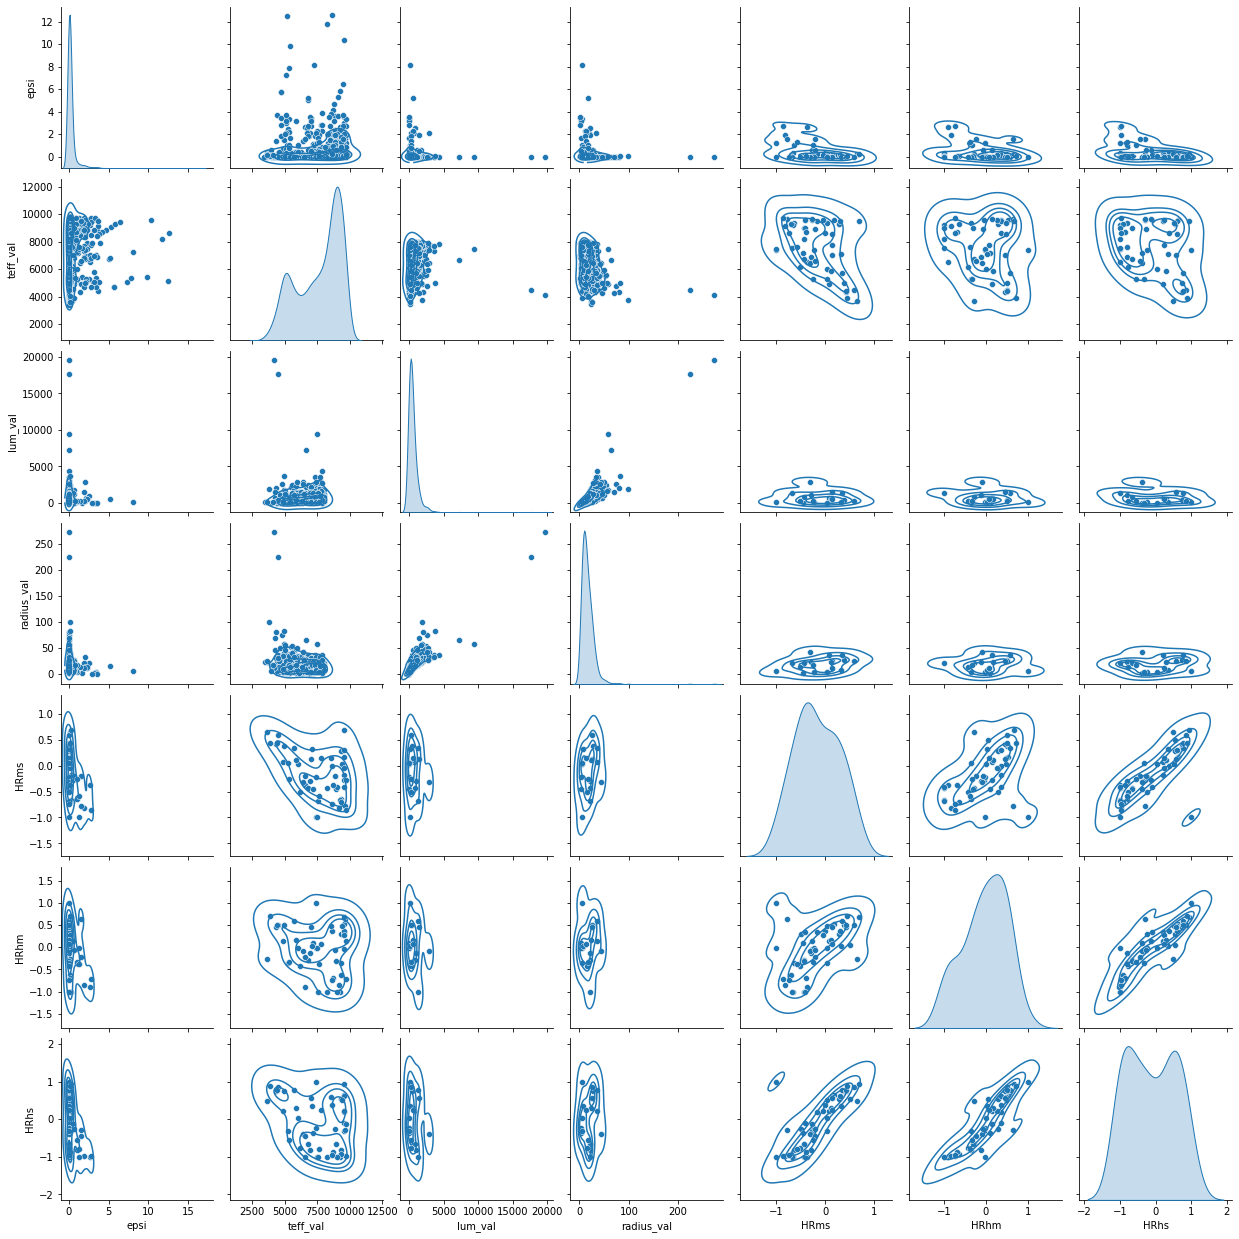

In [6]:
fig = plt.figure(figsize=(20,20))
g = sns.pairplot(master, vars=['epsi', 'teff_val', 'lum_val', 'radius_val', 'HRms', 'HRhm', 'HRhs'], diag_kind="kde")
g.map_offdiag(sns.kdeplot, levels=5)
fig.suptitle("Chandra distribution pairplot")
plt.show()

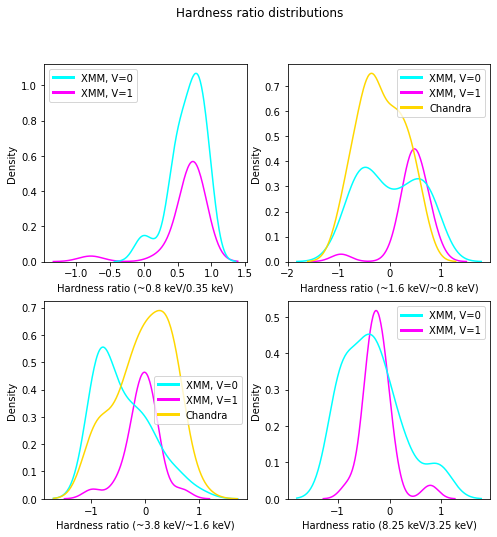

In [7]:
legend_elements = [Line2D([0],[0], color="cyan", lw=3, label="XMM, V=0"),
                    Line2D([0],[0], color="fuchsia", lw=3, label="XMM, V=1"),
                    Line2D([0],[0], color="gold", lw=3, label="Chandra")]

fig, axs = plt.subplots(figsize=(8,8), ncols=2, nrows=2)

sns.kdeplot(data=master, x="HR1", hue="VarFlag", palette="cool", ax=axs[0,0], legend=True)
#sns.kdeplot(data=master, x="HR_su", color="green", label="Chandra", ax=axs[0,0])
axs[0,0].set_xlabel("Hardness ratio (~0.8 keV/0.35 keV)")
axs[0,0].legend(handles=legend_elements[:2])
sns.kdeplot(data=master, x="HR2", hue="VarFlag", palette="cool", ax=axs[0,1])
sns.kdeplot(data=master, x="HRms", color="gold", label="Chandra", ax=axs[0,1])
axs[0,1].set_xlabel("Hardness ratio (~1.6 keV/~0.8 keV)")
axs[0,1].legend(handles=legend_elements)
sns.kdeplot(data=master, x="HR3", hue="VarFlag", palette="cool", ax=axs[1,0])
sns.kdeplot(data=master, x="HRhm", color="gold", label="Chandra", ax=axs[1,0])
axs[1,0].set_xlabel("Hardness ratio (~3.8 keV/~1.6 keV)")
axs[1,0].legend(handles=legend_elements)
sns.kdeplot(data=master, x="HR4", hue="VarFlag", palette="cool", ax=axs[1,1])
axs[1,1].set_xlabel("Hardness ratio (8.25 keV/3.25 keV)")
axs[1,1].legend(handles=legend_elements[:2])
fig.suptitle("Hardness ratio distributions")
fig.savefig("./plots/HR_dist.png", bbox_inches="tight", dpi=300)

## X-ray flux plots

In [8]:
xmm_flux = pd.DataFrame({column:[1e26*value/1000 for value in master[column]]
                         for column in [f"Flux{i}" for i in "123458"]})
xmm_flux[["Gflux","VarFlag"]] = master[["Gflux","VarFlag"]]
xmm_bands = dict(zip(list("1234589"),[(0.2,0.5),(0.5,1.0),(1.0,2.0),(2.0,4.5),(4.5,12.0),(0.2,12.0),(0.5,4.5)]))

chandra_flux = pd.DataFrame({column:[1e26*value/1000 for value in master[column]]
                             for column in [f"Flux{i}" for i in "usmhb"]})
chandra_flux["Gflux"] = master["Gflux"]
chandra_bands = {"b":(0.5,7), "h":(2,7), "m":(1.2,2), "s":(0.5,1.2), "u":(0.2,0.5)}

c:\users\caden gobat\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


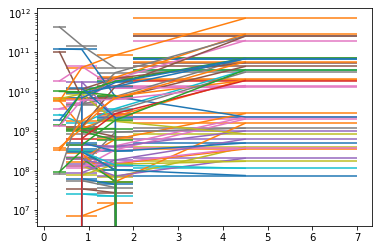

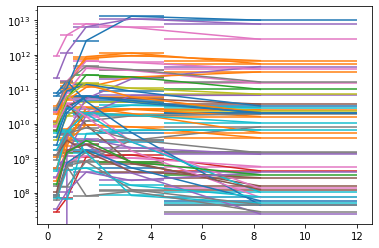

In [9]:
x = [np.mean(chandra_bands[i]) for i in "usmh"]
x_err = [(chandra_bands[i][1]-chandra_bands[i][0])/2 for i in "usmh"]
for row in chandra_flux.values:
    plt.errorbar(x,row[:4],xerr=x_err)
    plt.yscale("log")
plt.show()

x = [np.mean(xmm_bands[i]) for i in "12345"]
x_err = [(xmm_bands[i][1]-xmm_bands[i][0])/2 for i in "12345"]
for row in xmm_flux.values:
    plt.errorbar(x,row[:5],xerr=x_err)
    plt.yscale("log")
plt.show()

In [10]:
def interactive_plot(xvar, yvar, color, size, logx, logy):
    fig, ax = plt.subplots(figsize=(8,8))
    scatter_obj = sns.scatterplot(data=master.dropna(subset=[xvar,yvar,color],axis=0),
                                  x=xvar, y=yvar, hue=color, s=size*2, ax=ax)
    ax.set(xlabel=xvar, ylabel=yvar, title="{} vs. {}".format(yvar,xvar))#,
           #xlim=(master[xvar].min()+1,master[xvar].max()), ylim=(master[yvar].min()+1,master[yvar].max()))
    if logx:
        ax.set_xscale("log")
    if logy:
        ax.set_yscale("log")
    plt.show()

interactive(interactive_plot, xvar=num_options, yvar=num_options, color=cat_options, size=10, logx=False, logy=False)

interactive(children=(Dropdown(description='xvar', options=('V', 'vsini', 'Fluxb', 'Fluxh', 'Fluxm', 'Fluxs', …